# Lab 6: Statistical Inference for Proportions
## Name
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns

# Exercise 1

The race_justice dataset are the results from a Yahoo! News poll conducted by YouGov on May 29-31, 2020. In total 1060 U.S. adults were asked a series of questions regarding race and justice in the wake of the killing of George Floyd by a police officer. Results in this data set are percentages for the question, "Do you think Blacks and Whites receive equal treatment from the police?" For this particular question there were 1059 respondents. Load the dataset and classify the different variables in the study.

---

Type your response here.

In [2]:
race_justice = pd.read_csv("race_justice.csv", na_values='NaN')

race_justice

,Unnamed: 0,race_eth,response
0,1,White,Yes
1,2,White,Yes
2,3,White,Yes
3,4,White,Yes
4,5,White,Yes
...,...,...,...
1054,1055,Other,Not sure
1055,1056,Other,Not sure
1056,1057,Other,Not sure
1057,1058,Other,Not sure


# Exercise 2

Construct a confidence interval to estimate the percent of people who believe that Blacks and Whites receive equal treatment from the police. Interpret your results.

---

Type your response here.

The observed proportion of people who believe that Blacks and Whites receive equal treatment from the police is 0.22285174693106705


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
UsageError: Line magic function `%print("The` not found.


The 95% confidence interval from bootstrapping is: [ 0.20113314447592068 , 0.24362606232294617 ]


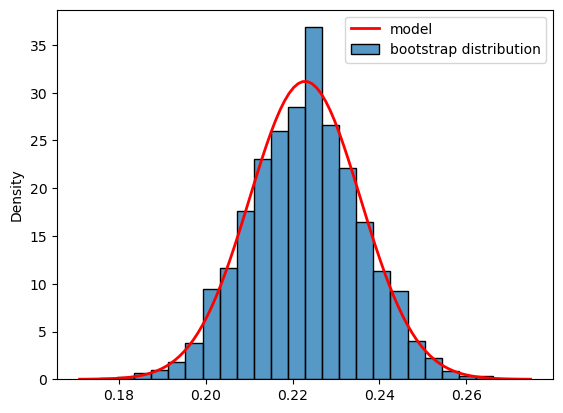

In [3]:
p_yes = race_justice['response'].value_counts(normalize=True)['Yes']
print("The observed proportion of people who believe that Blacks and Whites receive equal treatment from the police is", p_yes)

bootstrap_dist_yes = []

for x in range(10000):
    simulated_responses = pd.DataFrame().assign(response=race_justice['response'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_dist_yes.append(simulated_responses['response'].value_counts(normalize=True)['Yes'])

bootstrap_dist_yes.sort()
ax = sns.histplot(data=bootstrap_dist_yes, bins=24, label='bootstrap distribution', stat='density')

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc=p_yes, scale=((p_yes * (1 - p_yes))/len(race_justice))**0.5)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

print("The 95% confidence interval from bootstrapping is: [", bootstrap_dist_yes[int(0.05*len(bootstrap_dist_yes))], ",", bootstrap_dist_yes[int(0.95*len(bootstrap_dist_yes))], "]")
%print("The 95% confidence interval from the model is:", st.norm.interval(confidence=0.95, loc=p_yes, scale=((p_yes * (1 - p_yes))/len(race_justice))**0.5))

# Exercise 3

Conduct a hypothesis test comparing the percent of Black people vs White people who believe that Blacks and Whites receive equal treatment from the police. Be sure to include a confidence interval and interpret your results.

---

Type your response here.

The difference in observed proportions of Black people vs White people who believe that Blacks and Whites receive equal treatement from the police is -0.2009567537064587
The p-value for a two-tailed test from the simulated data is 0.0


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


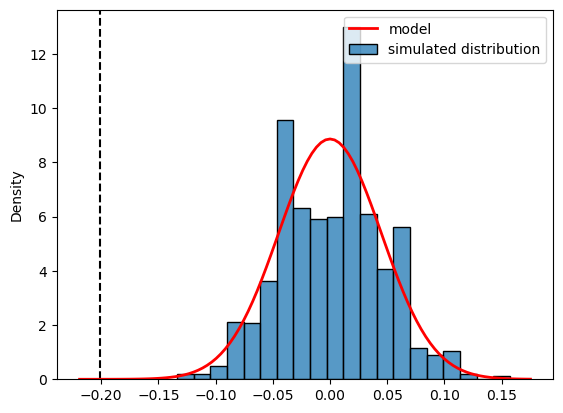

In [4]:
race_justice_bw = race_justice[(race_justice.race_eth == "Black") | (race_justice.race_eth == "White")]

p_black_yes = race_justice_bw.groupby('race_eth')['response'].value_counts(normalize=True)[('Black', 'Yes')]
p_white_yes = race_justice_bw.groupby('race_eth')['response'].value_counts(normalize=True)[('White', 'Yes')]
p_diff = p_black_yes - p_white_yes
print("The difference in observed proportions of Black people vs White people who believe that Blacks and Whites receive equal treatement from the police is", p_diff)

sim_difference = []

for x in range(1000):
    sim_one_mix = pd.DataFrame().assign(race_eth=race_justice_bw['race_eth'], response=race_justice_bw['response'].sample(frac=1, ignore_index=True))
    sim_difference.append(sim_one_mix.groupby('race_eth')['response'].value_counts(normalize=True)[('Black','Yes')] - sim_one_mix.groupby('race_eth')['response'].value_counts(normalize=True)[('White','Yes')])

ax = sns.histplot(data=sim_difference, bins=20, label="simulated distribution", stat='density')
ax.axvline(x = p_diff, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

n_black = race_justice_bw['race_eth'].value_counts()[('Black')]
n_white = race_justice_bw['race_eth'].value_counts()[('White')]
p_pool = (p_black_yes * n_black + p_white_yes * n_white)/(n_black + n_white)

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc=0, scale=(p_pool * (1 - p_pool) * ((1 / n_black) + (1 / n_white)))**0.5)

ax.plot(x_pdf, y_pdf, 'red', lw=2, label='model')                                                   
ax.legend()

print("The p-value for a two-tailed test from the simulated data is", 2*len([i for i in sim_difference if i < p_diff]) / len(sim_difference))

The 95% confidence interval from bootstrapping is: [ -0.24620376545426562 , -0.15191350741291748 ]


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


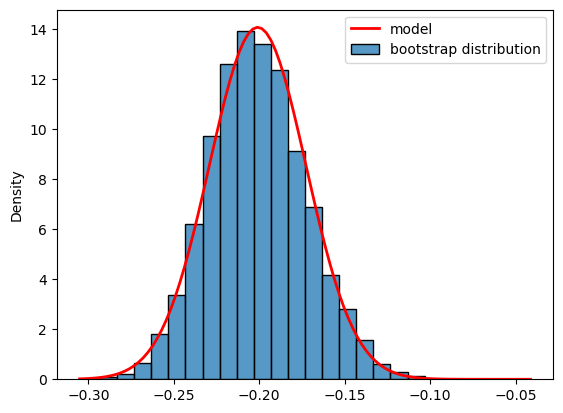

In [5]:
race_justice_black = race_justice[race_justice.race_eth == "Black"]
race_justice_white = race_justice[race_justice.race_eth == "White"]

bootstrap_difference_dist = []

for x in range(10000):
    sim_black = pd.DataFrame({'response' : pd.Categorical(race_justice_black['response'].sample(frac=1, replace=True, ignore_index=True), categories=race_justice['response'].unique())})
    sim_white = pd.DataFrame().assign(response=race_justice_white['response'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_difference_dist.append(sim_black['response'].value_counts(normalize=True)['Yes'] - sim_white['response'].value_counts(normalize=True)['Yes'])

bootstrap_difference_dist.sort()
ax = sns.histplot(data=bootstrap_difference_dist, bins=24, label='bootstrap distribution', stat='density')
print("The 95% confidence interval from bootstrapping is: [", bootstrap_difference_dist[int(0.05*len(bootstrap_difference_dist))], ",", bootstrap_difference_dist[int(0.95*len(bootstrap_difference_dist))], "]")

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc=p_diff, scale=((((p_black_yes *(1 - p_black_yes))/n_black) + ((p_white_yes * (1 - p_white_yes))/n_white))**0.5))

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

# Exercise 4

We see above that Black and White people seem to have different responses to the question "Do you think Blacks and Whites receive equal treatment from the police?" Does race and ethnicity seem to lead to different responses to this question? Create a two-way table of the race_justice dataset and perform a hypothesis test.

---

Type your response here.

In [6]:
crosstab = pd.crosstab(race_justice['race_eth'], race_justice['response'])

print("The observed chi-squared value for this table is:", st.chi2_contingency(crosstab).statistic)

crosstab

The observed chi-squared value for this table is: 53.96431970400944


response,No,Not sure,Yes
race_eth,,,
Black,92,3,6
Hispanic,75,14,15
Other,47,21,14
White,486,85,201


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The p-value for a chi-squared test from the simulated data is 0.0


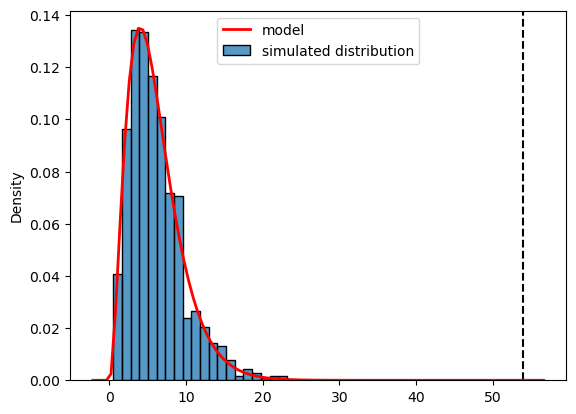

In [7]:
sim_crosstab = []

for x in range(1000):
    sim_survey = pd.DataFrame().assign(race_eth=race_justice['race_eth'], response=race_justice['response'].sample(frac=1, ignore_index=True))
    sim_crosstab.append(st.chi2_contingency(pd.crosstab(sim_survey['race_eth'], sim_survey['response'])).statistic)

ax = sns.histplot(data=sim_crosstab, bins=20, label="simulated distribution", stat='density')
ax.axvline(x = st.chi2_contingency(crosstab).statistic, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.chi2.pdf(x_pdf, df=st.chi2_contingency(crosstab).dof)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

print("The p-value for a chi-squared test from the simulated data is", len([i for i in sim_crosstab if i > st.chi2_contingency(crosstab).statistic]) / len(sim_crosstab))

# Exercise 5

Based on these statistics that you have produced, what can you say in regards to the question "Do you think Blacks and Whites receive equal treatment from the police?"

---

Type your response here.